# Caso Predador-Presa (Lotka-Volterra) - [TAG: predadorpresa]

<b>Deadline:</b> Friday, 15 de April de 2022, 23:59

Realizar un programa interactivo del caso presa-predador para estudiar las salidas del programa cuando se cambien las condiciones del entorno y los parámetros de entrada. 

Considere los parámetros de natalidad de liebres y mortalidad de zorros analizados en el caso para una población ideal de 500 liebres y 10 zorros.

Pruebas de simulación:
1. Una simulación con los valores por defecto: 500 liebres y 10 zorros.
2. Una simulación con los valores por defecto: 2500 liebres y 2 zorros.
3. Dos simulaciones distintas cambiando las condiciones iniciales.

Para cada caso realizar una interpretación de los gráficos de comportamiento de las poblaciones, incluyendo capturas de los gráficos poblacionales y de diagrama de fase.

Entregar cada prueba:
- Con una explicación de los algoritmos principales utilizados en el programa.
- Graficando en pantalla los diagramas poblacionales y el diagrama de fase de cada prueba.


<b>Requisitos de la entrega</b>:
La entrega deberá cumplir los siguientes requisitos:
- El código deberá ser presentado en un repositorio git
- Se creará un tag/release para la versión "estable" del programa entregable. El tag deberá ser creado antes de la fecha límite de presentación.

Además del código propiamente dicho, y convenientemente ordenado, deberá contar con los siguientes archivos en el repositorio GIT:

- <b>INSTALL.md</b>: contendrá las instrucciones para clonar e instalar/lanzar la aplicación.
- <b>README.md</b>: contendrá la ayuda y uso básico de la aplicación.
- <b>README.info</b>: contendrá un informe sobre las decisiones principales de diseñodel sistema, y su justificación (por qué usar tal o cual método, paquete, módulo, etc, y cómo se implementaron las reglas del juego de la vida.
- <b>README.todo</b>: contendrá una lista detallada de mejoras características/features del sistema para futuras correcciones y versiones.

# Resolución

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Variación de poblaciones

Comenzamos analizando el sistema partiendo de dos primeras ecuaciones que indican la variacion de las poblaciones de  liebres "x" y zorros "y" de la siguiente manera:

### Variación de la poblacion de liebres respecto del tiempo

$$
\frac{dx}{dt} = \alpha x - \beta xy
$$

Donde:
- alfa: tasa de nacimiento de liebres
- beta: tasa de mortandad de liebres por la caza
- x: cantidad de liebres
- (x.y): encuentros entre liebres y zorros

### Variación de la poblacion de zorros respecto del tiempo

$$
\frac{dy}{dt} = \delta xy - \gamma y
$$

Donde:
- gamma: tasa de mortandad de zorros
- delta: tasa de crecimiento de zorros por la caza
- y: cantidad de zorros
- (x.y): encuentros entre liebres y zorros

## Derivadas expresadas como código

In [2]:
def get_variacion_presas(presas, predadores, alfa, beta, dt):
    return ((alfa * presas) - (beta * presas * predadores)) * dt


def get_variacion_predadores(presas, predadores, gamma, delta, dt):
    return ((delta * presas * predadores) - (gamma * predadores)) * dt

## Simulacion del modelo

In [3]:
def hacer_simulacion(dt, tiempo_inicial, presas_iniciales, predadores_iniciales, alfa, beta, gamma, delta,
                     cant_muestras):
    presas_arr = [presas_iniciales]
    predadores_arr = [predadores_iniciales]
    tiempo_arr = [tiempo_inicial]

    tiempo = tiempo_inicial
    presas = presas_iniciales
    predadores = predadores_iniciales

    for i in range(cant_muestras - 1):
        tiempo = tiempo + dt
        presas += get_variacion_presas(presas, predadores, alfa, beta, dt)
        predadores += get_variacion_predadores(presas, predadores, gamma, delta, dt)

        presas_arr.append(presas)
        predadores_arr.append(predadores)
        tiempo_arr.append(tiempo)

    return np.array(presas_arr), np.array(predadores_arr), np.array(tiempo_arr)

# Caso 1: 500 liebres y 10 zorros

## Condiciones de entorno y variables de entrada

In [13]:
liebres = 50
zorros = 10
semanas = 600
tiempo_inicial = 1
variacion_tiempo = 1

tasa_natalidad_lieb = 0.08
tasa_mortandad_lieb = 0.002
tasa_mortandad_zorr = 0.2
tasa_natalidad_zorr = 0.0004

liebres_arr, zorros_arr, tiempo_arr = hacer_simulacion(variacion_tiempo,
                                                       tiempo_inicial,
                                                       liebres,
                                                       zorros,
                                                       alfa=tasa_natalidad_lieb,
                                                       beta=tasa_mortandad_lieb,
                                                       gamma=tasa_mortandad_zorr,
                                                       delta=tasa_natalidad_zorr,
                                                       cant_muestras=semanas)

## Gráficos

<IPython.core.display.Javascript object>


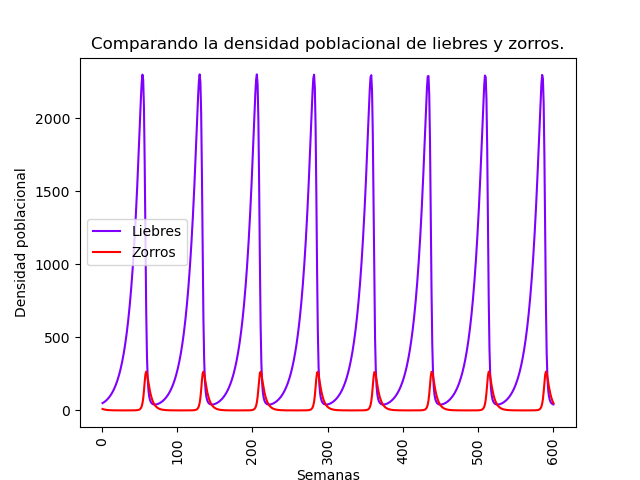

In [14]:
plt.close()
colors = cm.rainbow(np.linspace(0, 1, 2))

plt.plot(tiempo_arr,
         liebres_arr,
         c=colors[0],
         label="Liebres")
plt.plot(tiempo_arr,
         zorros_arr,
         c=colors[1],
         label="Zorros")
plt.title('Comparando la densidad poblacional de liebres y zorros.')
plt.xlabel('Semanas')
plt.xticks(rotation='90')
plt.legend()
plt.ylabel('Densidad poblacional')

plt.show()

<IPython.core.display.Javascript object>


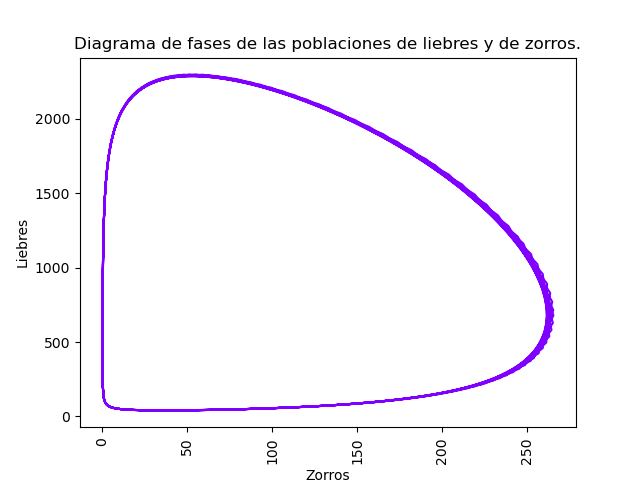

In [15]:
plt.close()
plt.plot(zorros_arr,
         liebres_arr,
         c=colors[0])
plt.title('Diagrama de fases de las poblaciones de liebres y de zorros.')
plt.xlabel('Zorros')
plt.xticks(rotation='90')
plt.ylabel('Liebres')

plt.show()

# Caso 2: 2500 liebres y 2 zorros

## Condiciones de entorno y variables de entrada

In [16]:
liebres = 2500
zorros = 2
semanas = 600
tiempo_inicial = 1
variacion_tiempo = 1

tasa_natalidad_lieb = 0.08
tasa_mortandad_lieb = 0.002
tasa_mortandad_zorr = 0.2
tasa_natalidad_zorr = 0.0004

liebres_arr, zorros_arr, tiempo_arr = hacer_simulacion(variacion_tiempo,
                                                       tiempo_inicial,
                                                       liebres,
                                                       zorros,
                                                       alfa=tasa_natalidad_lieb,
                                                       beta=tasa_mortandad_lieb,
                                                       gamma=tasa_mortandad_zorr,
                                                       delta=tasa_natalidad_zorr,
                                                       cant_muestras=semanas)

## Gráficos

<IPython.core.display.Javascript object>


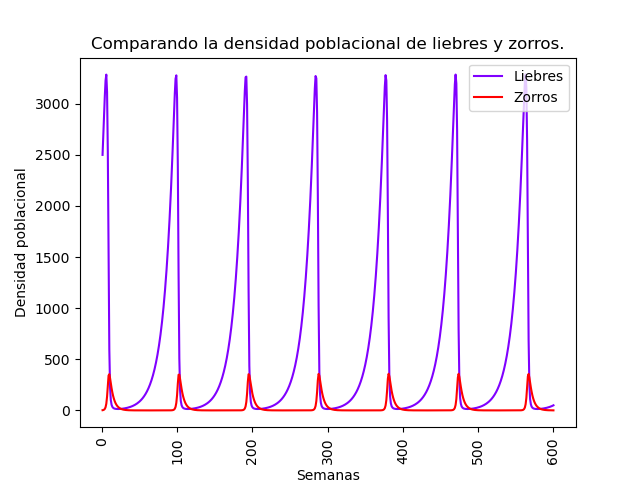

In [17]:
plt.close()
colors = cm.rainbow(np.linspace(0, 1, 2))

plt.plot(tiempo_arr,
         liebres_arr,
         c=colors[0],
         label="Liebres")
plt.plot(tiempo_arr,
         zorros_arr,
         c=colors[1],
         label="Zorros")
plt.title('Comparando la densidad poblacional de liebres y zorros.')
plt.xlabel('Semanas')
plt.xticks(rotation='90')
plt.legend()
plt.ylabel('Densidad poblacional')

plt.show()

<IPython.core.display.Javascript object>


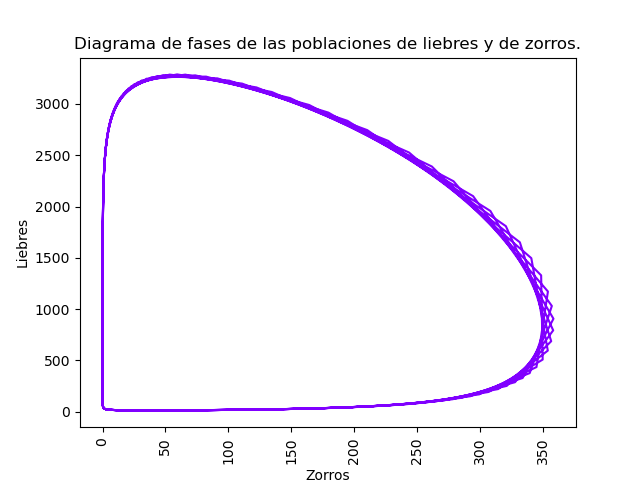

In [9]:
plt.close()
plt.plot(zorros_arr,
         liebres_arr,
         c=colors[0])
plt.title('Diagrama de fases de las poblaciones de liebres y de zorros.')
plt.xlabel('Zorros')
plt.xticks(rotation='90')
plt.ylabel('Liebres')

plt.show()

# Caso 3: cambio condiciones de entorno

## Condiciones de entorno y variables de entrada

In [24]:
liebres = 500
zorros = 10
semanas = 600
tiempo_inicial = 1
variacion_tiempo = 1

tasa_natalidad_lieb = 0.07
tasa_mortandad_lieb = 0.0015
tasa_mortandad_zorr = 0.15
tasa_natalidad_zorr = 0.00035

liebres_arr, zorros_arr, tiempo_arr = hacer_simulacion(variacion_tiempo,
                                                       tiempo_inicial,
                                                       liebres,
                                                       zorros,
                                                       alfa=tasa_natalidad_lieb,
                                                       beta=tasa_mortandad_lieb,
                                                       gamma=tasa_mortandad_zorr,
                                                       delta=tasa_natalidad_zorr,
                                                       cant_muestras=semanas)

## Gráficos

<IPython.core.display.Javascript object>


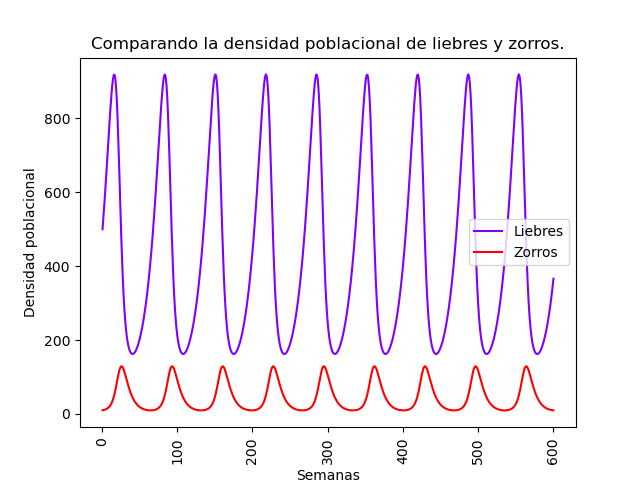

In [25]:
plt.close()
colors = cm.rainbow(np.linspace(0, 1, 2))

plt.plot(tiempo_arr,
         liebres_arr,
         c=colors[0],
         label="Liebres")
plt.plot(tiempo_arr,
         zorros_arr,
         c=colors[1],
         label="Zorros")
plt.title('Comparando la densidad poblacional de liebres y zorros.')
plt.xlabel('Semanas')
plt.xticks(rotation='90')
plt.legend()
plt.ylabel('Densidad poblacional')

plt.show()

<IPython.core.display.Javascript object>


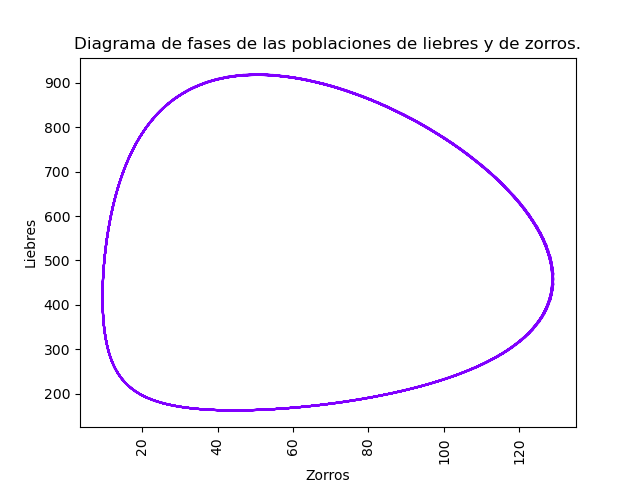

In [26]:
plt.close()
plt.plot(zorros_arr,
         liebres_arr,
         c=colors[0])
plt.title('Diagrama de fases de las poblaciones de liebres y de zorros.')
plt.xlabel('Zorros')
plt.xticks(rotation='90')
plt.ylabel('Liebres')

plt.show()